In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from  sklearn import metrics

In [6]:
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking if any feature has null values:

In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the types of data in certain features:

In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding categorical data to numeric form.


In [7]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':3}}, inplace = True)
car_data.replace({'Seller_Type':{"Dealer":0, 'Individual':1}}, inplace = True)
car_data.replace({'Transmission':{"Manual":0, 'Automatic':1}}, inplace = True)

In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

0    239
1     60
3      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


In [ ]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [8]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

Predicition using training data.

In [14]:
train_data_pred = lin_reg.predict(xtrain)

Checking Rsquare score (Lower is better)

In [16]:
r2_score = metrics.r2_score(ytrain, train_data_pred)
r2_score

0.8777735182846064

Scatter plot of actual prices vs predicted prices.

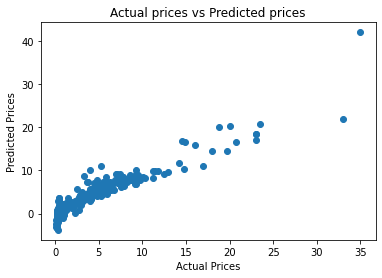

In [17]:
plt.scatter(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

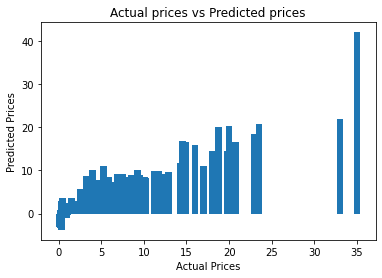

In [18]:
plt.bar(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

Prediction using test data.

In [25]:
test_data_pred = lin_reg.predict(xtest)


In [23]:
r2_score = metrics.r2_score(ytest, test_data_pred)
r2_score

0.8162925313688285

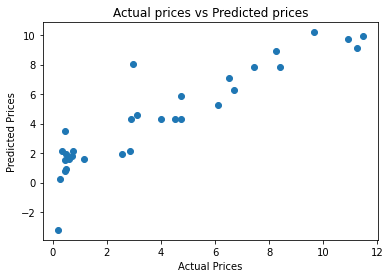

In [26]:
plt.scatter(ytest, test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

Now using lasso regression.

In [31]:
lasso_reg = Lasso()

In [32]:
lasso_reg.fit(xtrain, ytrain)

Lasso()

Predicition using training data.

In [33]:
train_data_pred = lasso_reg.predict(xtrain)

Checking Rsquare score (Lower is better)

In [34]:
r2_score = metrics.r2_score(ytrain, train_data_pred)
r2_score

0.8427856123435794

Scatter plot of actual prices vs predicted prices.

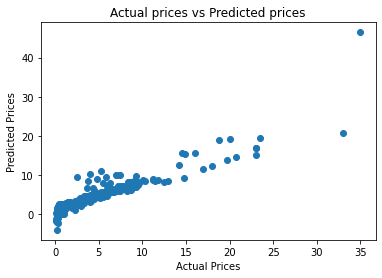

In [35]:
plt.scatter(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

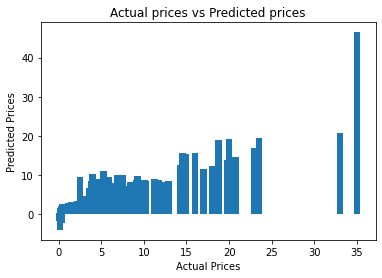

In [36]:
plt.bar(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

Prediction using test data.

In [37]:
test_data_pred = lin_reg.predict(xtest)


In [38]:
r2_score = metrics.r2_score(ytest, test_data_pred)
r2_score

0.8162925313688285

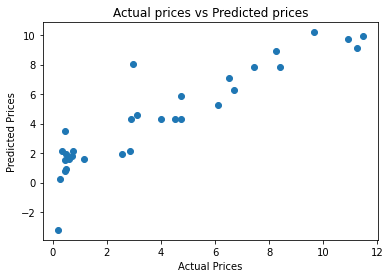

In [39]:
plt.scatter(ytest, test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

Finally ridge regression.

In [42]:
ridge_reg = Ridge()

In [43]:
ridge_reg.fit(xtrain, ytrain)

Ridge()

Predicition using training data.

In [44]:
train_data_pred = ridge_reg.predict(xtrain)

Checking Rsquare score (Lower is better)

In [45]:
r2_score = metrics.r2_score(ytrain, train_data_pred)
r2_score

0.8777460056701492

Scatter plot of actual prices vs predicted prices.

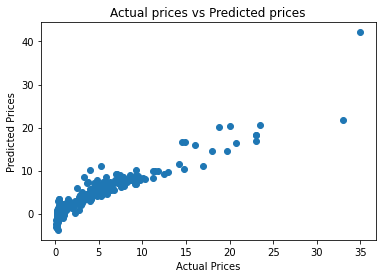

In [46]:
plt.scatter(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

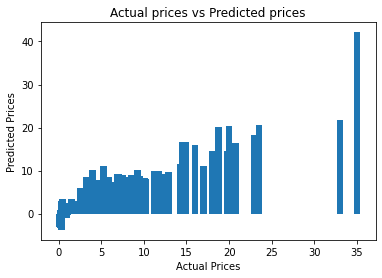

In [47]:
plt.bar(ytrain, train_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

Prediction using test data.

In [48]:
test_data_pred = lin_reg.predict(xtest)


In [49]:
r2_score = metrics.r2_score(ytest, test_data_pred)
r2_score

0.8162925313688285

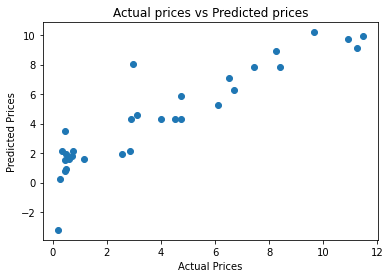

In [50]:
plt.scatter(ytest, test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted prices')
plt.show()